In [23]:
#importing relevant libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [2]:
#importing the dataframe
data=pd.read_csv('iris.csv')

In [3]:
data.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [4]:
data.describe()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
#seeing if theres any null entries
data.isna().sum()

Unnamed: 0      0
Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [6]:
data

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [8]:
#the different Species of the flowers
data['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [10]:
#the amount of flowers having the same species
print('No of virginica flowers in our Dataset:', len(data[data['Species']=='virginica']))
print('No of setosa flowers in our Dataset:', len(data[data['Species']=='setosa']))
print('No of Versicolor flowers in our Dataset:',len(data[data['Species']=='versicolor']))

No of virginica flowers in our Dataset: 50
No of setosa flowers in our Dataset: 50
No of Versicolor flowers in our Dataset: 50


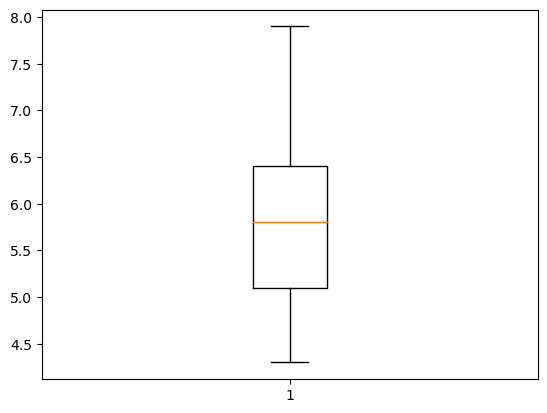

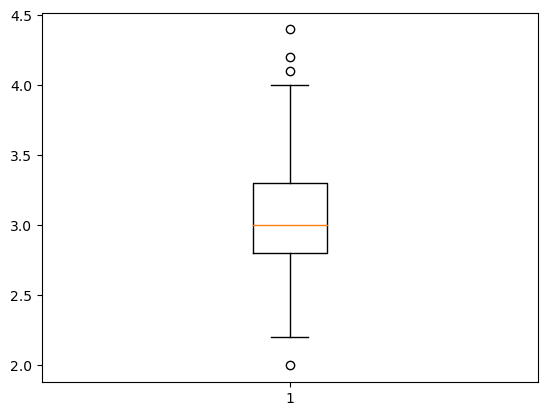

In [13]:
#we check for outliers in the dataframe using box and whisker plot
plt.figure(1)
plt.boxplot([data['Sepal.Length']])
plt.figure(2)
plt.boxplot([data['Sepal.Width']])
plt.show()

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'Sepal.Length'}>],
       [<Axes: title={'center': 'Sepal.Width'}>,
        <Axes: title={'center': 'Petal.Length'}>],
       [<Axes: title={'center': 'Petal.Width'}>, <Axes: >]], dtype=object)

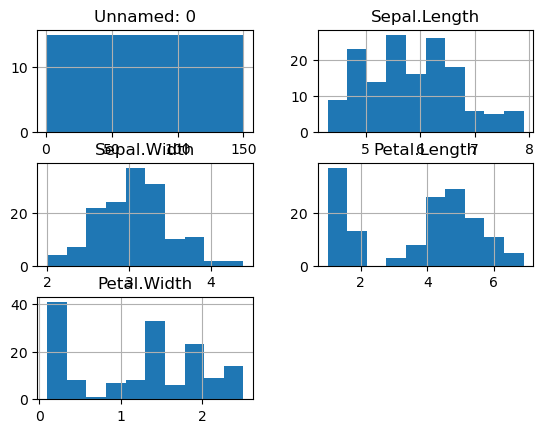

In [14]:
data.hist()

C:\Users\thead\AppData\Local\Temp\ipykernel_1860\2686172690.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fig=sns.heatmap(data.corr(),annot=True,cmap='BuPu',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)


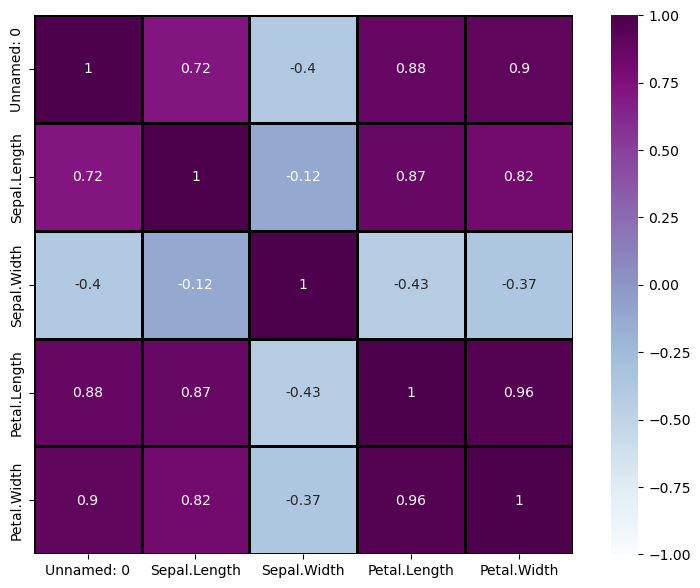

In [16]:
#heatmaps
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.heatmap(data.corr(),annot=True,cmap='BuPu',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

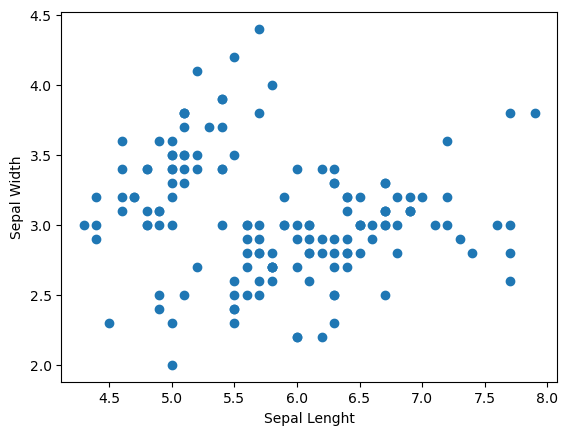

In [19]:
#scatter plot linking between the sepal's lenght and width
x=data['Sepal.Length'].values.reshape(-1,1)
y=data['Sepal.Width'].values.reshape(-1,1)


plt.xlabel('Sepal Lenght')
plt.ylabel('Sepal Width')
plt.scatter(x,y)

In [22]:
#Correlation matrix
c_matrix=data.corr()
data.corr()


C:\Users\thead\AppData\Local\Temp\ipykernel_1860\1319105054.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c_matrix=data.corr()
C:\Users\thead\AppData\Local\Temp\ipykernel_1860\1319105054.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Unnamed: 0,1.000000,0.716676,-0.402301,0.882637,0.900027
Sepal.Length,0.716676,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.402301,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.882637,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.900027,0.817941,-0.366126,0.962865,1.000000


In [26]:
# train/test splitting

train,test=train_test_split(data,test_size=0.25)
print(test.shape)
print(train.shape)

(38, 6)
(112, 6)


In [27]:
train_x=train[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']]
train_y=train.Species
test_x=train[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']]
test_y=train.Species

In [28]:
train_x

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
19,5.1,3.8,1.5,0.3
47,4.6,3.2,1.4,0.2
88,5.6,3.0,4.1,1.3
26,5.0,3.4,1.6,0.4
24,4.8,3.4,1.9,0.2
...,...,...,...,...
125,7.2,3.2,6.0,1.8
76,6.8,2.8,4.8,1.4
97,6.2,2.9,4.3,1.3
93,5.0,2.3,3.3,1.0


In [29]:
test_y

19         setosa
47         setosa
88     versicolor
26         setosa
24         setosa
          ...    
125     virginica
76     versicolor
97     versicolor
93     versicolor
12         setosa
Name: Species, Length: 112, dtype: object

In [32]:
#we use LogisticRegression model

model_log=LogisticRegression()
model_log.fit(train_x,train_y)
results=model_log.predict(train_x)

In [35]:
print('Accuracy:',metrics.accuracy_score(results,test_y).round(5))

Accuracy: 0.97321


In [36]:
#we create a confusion matrix + classification_report
from sklearn.metrics import confusion_matrix,classification_report

confusion_mat = confusion_matrix(test_y,results)
print("Confusion matrix: \n",confusion_mat)
print(classification_report(test_y,results))

Confusion matrix: 
 [[41  0  0]
 [ 0 37  1]
 [ 0  2 31]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        41
  versicolor       0.95      0.97      0.96        38
   virginica       0.97      0.94      0.95        33

    accuracy                           0.97       112
   macro avg       0.97      0.97      0.97       112
weighted avg       0.97      0.97      0.97       112

